# FBProphet prediction 


In [ ]:
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


In [ ]:

import warnings
import itertools
import numpy as np
import matplotlib.pyplot as plt
warnings.filterwarnings("ignore")
plt.style.use('fivethirtyeight')
import pandas as pd
import statsmodels.api as sm
import matplotlib

matplotlib.rcParams['axes.labelsize'] = 14
matplotlib.rcParams['xtick.labelsize'] = 12
matplotlib.rcParams['ytick.labelsize'] = 12
matplotlib.rcParams['text.color'] = 'k'

First things first, we upload the database into the Notebook

In [ ]:
#For Google Colab
path = "/content/drive/My Drive/Colab Notebooks/"
file1 = "57_countries.csv"
df = pd.read_csv(path+file1)

df.head()


,country,year,sex,age,suicides_no,population,suicides/100k pop,country-year,gdp_for_year ($),gdp_per_capita ($),generation,Country-Age-sex,Total_suicides,Total_population,Max_Suicide,Max_Population,Min_suicides,min_population,Mean_suicides,Mean_population,GDP_percentage_growth,Population_percentage_growth,SPPI,countrylabel,sexlabel,agelabel,genlabels,Country-Age-sex-range,5-14 years,15-24 years,25-34 years,35-54 years,55-74 years,75+ years
0,Argentina,1985,male,75+ years,202,363000,55.65,Argentina1985,8.841667e+10,3264,G.I. Generation,Argentina1985-male,1450,13399900,485,3346300,16,363000,241.666667,2233316.667,-5.189024,1.598563,0.000108,2,1,5,1,Argentina1985-male-75+ years,0,0,0,0,0,202
1,Argentina,1985,male,55-74 years,485,1997000,24.29,Argentina1985,8.841667e+10,3264,G.I. Generation,Argentina1985-male,1450,13399900,485,3346300,16,363000,241.666667,2233316.667,-5.189024,1.598563,0.000108,2,1,4,1,Argentina1985-male-55-74 years,0,0,0,0,485,0
2,Argentina,1985,male,35-54 years,414,3346300,12.37,Argentina1985,8.841667e+10,3264,Silent,Argentina1985-male,1450,13399900,485,3346300,16,363000,241.666667,2233316.667,-5.189024,1.598563,0.000108,2,1,2,5,Argentina1985-male-35-54 years,0,0,0,414,0,0
3,Argentina,1985,male,25-34 years,177,2234200,7.92,Argentina1985,8.841667e+10,3264,Boomers,Argentina1985-male,1450,13399900,485,3346300,16,363000,241.666667,2233316.667,-5.189024,1.598563,0.000108,2,1,1,0,Argentina1985-male-25-34 years,0,0,177,0,0,0
4,Argentina,1985,male,15-24 years,156,2415200,6.46,Argentina1985,8.841667e+10,3264,Generation X,Argentina1985-male,1450,13399900,485,3346300,16,363000,241.666667,2233316.667,-5.189024,1.598563,0.000108,2,1,0,2,Argentina1985-male-15-24 years,0,156,0,0,0,0


In [ ]:
male_df = df[df["sex"] == "male"]
male_df = male_df.reset_index(drop=True)
female_df = df[df["sex"] == "female"]
female_df = female_df.reset_index(drop=True)

In [ ]:
male_df = male_df.reset_index(drop=True)
female_df = female_df.reset_index(drop=True)

In [ ]:
male_df

,country,year,sex,age,suicides_no,population,suicides/100k pop,country-year,gdp_for_year ($),gdp_per_capita ($),generation,Country-Age-sex,Total_suicides,Total_population,Max_Suicide,Max_Population,Min_suicides,min_population,Mean_suicides,Mean_population,GDP_percentage_growth,Population_percentage_growth,SPPI,countrylabel,sexlabel,agelabel,genlabels,Country-Age-sex-range,5-14 years,15-24 years,25-34 years,35-54 years,55-74 years,75+ years
0,Argentina,1985,male,75+ years,202,363000,55.65,Argentina1985,8.841667e+10,3264,G.I. Generation,Argentina1985-male,1450,13399900,485,3346300,16,363000,241.666667,2.233317e+06,-5.189024,1.598563,0.000108,2,1,5,1,Argentina1985-male-75+ years,0,0,0,0,0,202
1,Argentina,1985,male,55-74 years,485,1997000,24.29,Argentina1985,8.841667e+10,3264,G.I. Generation,Argentina1985-male,1450,13399900,485,3346300,16,363000,241.666667,2.233317e+06,-5.189024,1.598563,0.000108,2,1,4,1,Argentina1985-male-55-74 years,0,0,0,0,485,0
2,Argentina,1985,male,35-54 years,414,3346300,12.37,Argentina1985,8.841667e+10,3264,Silent,Argentina1985-male,1450,13399900,485,3346300,16,363000,241.666667,2.233317e+06,-5.189024,1.598563,0.000108,2,1,2,5,Argentina1985-male-35-54 years,0,0,0,414,0,0
3,Argentina,1985,male,25-34 years,177,2234200,7.92,Argentina1985,8.841667e+10,3264,Boomers,Argentina1985-male,1450,13399900,485,3346300,16,363000,241.666667,2.233317e+06,-5.189024,1.598563,0.000108,2,1,1,0,Argentina1985-male-25-34 years,0,0,177,0,0,0
4,Argentina,1985,male,15-24 years,156,2415200,6.46,Argentina1985,8.841667e+10,3264,Generation X,Argentina1985-male,1450,13399900,485,3346300,16,363000,241.666667,2.233317e+06,-5.189024,1.598563,0.000108,2,1,0,2,Argentina1985-male-15-24 years,0,156,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9908,Uruguay,2015,male,55-74 years,133,277870,47.86,Uruguay2015,5.327430e+10,16696,Boomers,Uruguay2015-male,499,1533497,135,423963,3,78996,83.166667,2.555828e+05,0.370741,0.339820,0.000325,98,1,4,0,Uruguay2015-male-55-74 years,0,0,0,0,133,0
9909,Uruguay,2015,male,25-34 years,96,235597,40.75,Uruguay2015,5.327430e+10,16696,Millenials,Uruguay2015-male,499,1533497,135,423963,3,78996,83.166667,2.555828e+05,0.370741,0.339820,0.000325,98,1,1,4,Uruguay2015-male-25-34 years,0,0,96,0,0,0
9910,Uruguay,2015,male,35-54 years,135,423963,31.84,Uruguay2015,5.327430e+10,16696,Generation X,Uruguay2015-male,499,1533497,135,423963,3,78996,83.166667,2.555828e+05,0.370741,0.339820,0.000325,98,1,2,2,Uruguay2015-male-35-54 years,0,0,0,135,0,0
9911,Uruguay,2015,male,15-24 years,74,264562,27.97,Uruguay2015,5.327430e+10,16696,Millenials,Uruguay2015-male,499,1533497,135,423963,3,78996,83.166667,2.555828e+05,0.370741,0.339820,0.000325,98,1,0,4,Uruguay2015-male-15-24 years,0,74,0,0,0,0


In [ ]:
male_df['year'].min(),male_df['year'].max()

(1985, 2016)

In [ ]:
female_df['year'].min(),female_df['year'].max()

(1985, 2016)

## Data preprocessing

This step is always important because it will make our models more accurate and precise.

In [ ]:
cols = ['sex', 'age','population','suicides/100k pop', 'country-year', ' gdp_for_year ($) ','gdp_per_capita ($)', 'generation', 'Country-Age-sex', 'suicides_no','Total_population', 'Max_Suicide', 'Max_Population', 'Min_suicides','min_population', 'Mean_suicides', 'Mean_population','GDP_percentage_growth', 'Population_percentage_growth', 'SPPI', 'countrylabel', 'sexlabel', 'agelabel', 'genlabels','Country-Age-sex-range', '5-14 years', '15-24 years', '25-34 years','35-54 years', '55-74 years', '75+ years']
male_df.drop(cols, axis = 1, inplace= True)
female_df.drop(cols, axis = 1, inplace= True)


In [ ]:
male_df.set_index('year', inplace = True)
male_df.sort_values(by = ['year', 'country'], inplace = True)
male_df.sort_index(inplace = True)
female_df.set_index('year', inplace = True)
female_df.sort_values(by = ['year', 'country'], inplace = True)
female_df.sort_index(inplace = True)

In [ ]:
male_df

,country,Total_suicides
year,,
1985,Argentina,1450
1985,Argentina,1450
1985,Argentina,1450
1985,Argentina,1450
1985,Argentina,1450
...,...,...
2016,Thailand,3275
2016,Thailand,3275
2016,Thailand,3275


In [ ]:
# y = male_df[male_df["country"] == s][t].resample('Y').mean()
i = male_df.index
pd.PeriodIndex(i, freq='A')
male_df.index = pd.PeriodIndex(i, freq='A')
i = female_df.index
pd.PeriodIndex(i, freq='A')
female_df.index = pd.PeriodIndex(i, freq='A')

In [ ]:
new_df = male_df[male_df['country'] == "Mexico"]
new_df.drop('country', axis = 1, inplace= True)

In [ ]:
new_df = new_df.drop_duplicates()

In [ ]:
wea = pd.DataFrame()
datatime = pd.date_range(new_df.index[0].strftime('%Y') + "-12-31", periods=int(new_df.index[-1].strftime('%Y')) - int(new_df.index[0].strftime('%Y'))+1, freq="Y")

In [ ]:
datatime

DatetimeIndex(['1985-12-31', '1986-12-31', '1987-12-31', '1988-12-31',
               '1989-12-31', '1990-12-31', '1991-12-31', '1992-12-31',
               '1993-12-31', '1994-12-31', '1995-12-31', '1996-12-31',
               '1997-12-31', '1998-12-31', '1999-12-31', '2000-12-31',
               '2001-12-31', '2002-12-31', '2003-12-31', '2004-12-31',
               '2005-12-31', '2006-12-31', '2007-12-31', '2008-12-31',
               '2009-12-31', '2010-12-31', '2011-12-31', '2012-12-31',
               '2013-12-31', '2014-12-31', '2015-12-31'],
              dtype='datetime64[ns]', freq='A-DEC')

In [ ]:
new_df.index = datatime
new_df

,Total_suicides
1985-12-31,1279
1986-12-31,1445
1987-12-31,1416
1988-12-31,1423
1989-12-31,1580
1990-12-31,1648
1991-12-31,1789
1992-12-31,1899
1993-12-31,2011
1994-12-31,2195


In [ ]:
new_df= new_df.reset_index()
new_df

,index,Total_suicides
0,1985-12-31,1279
1,1986-12-31,1445
2,1987-12-31,1416
3,1988-12-31,1423
4,1989-12-31,1580
5,1990-12-31,1648
6,1991-12-31,1789
7,1992-12-31,1899
8,1993-12-31,2011
9,1994-12-31,2195


INFO:fbprophet:n_changepoints greater than number of observations. Using 23.


<Figure size 1296x432 with 0 Axes>

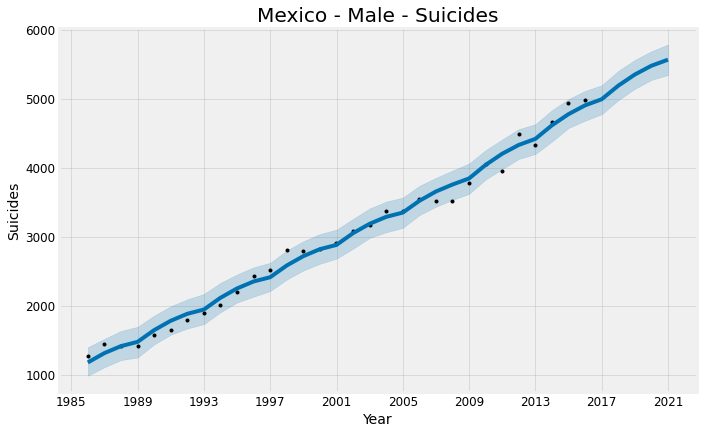

In [ ]:
from fbprophet import Prophet

new_df = new_df.rename(columns = {'index': 'ds', 'Total_suicides': 'y'})
argentina_model = Prophet(weekly_seasonality=False, daily_seasonality=False,interval_width=0.95)
argentina_model.fit(new_df)

argentina_forecast = argentina_model.make_future_dataframe(periods=5, freq='Y')
argentina_forecast = argentina_model.predict(argentina_forecast)

plt.figure(figsize=(18, 6))
argentina_model.plot(argentina_forecast, xlabel = 'Year', ylabel = 'Suicides')
plt.title('Mexico - Male - Suicides');

In [ ]:
## Total No of Suicides
targets = male_df.columns[3:4]

country = male_df["country"].unique()
## Total No of Suicides
fetargets = female_df.columns[3:4]

fecountry = female_df["country"].unique()


Men range 5-14 year Argentina 's suicides_no


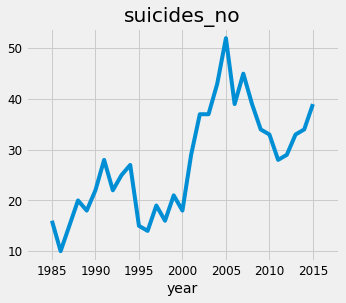

Men range 5-14 year Australia 's suicides_no


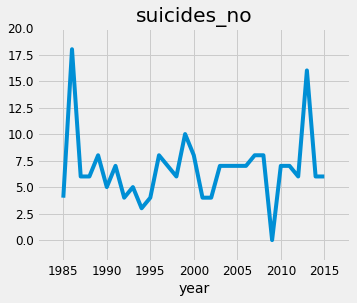

Men range 5-14 year Austria 's suicides_no


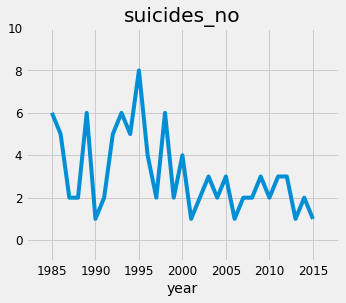

Men range 5-14 year Barbados 's suicides_no


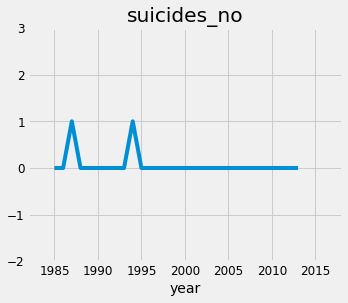

Men range 5-14 year Belgium 's suicides_no


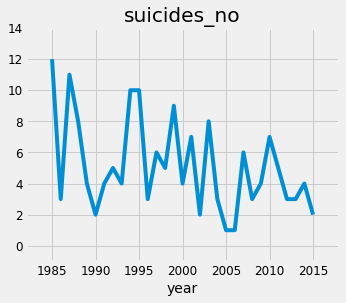

Men range 5-14 year Brazil 's suicides_no


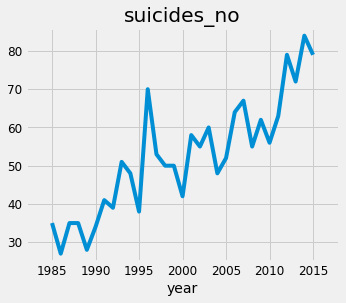

Men range 5-14 year Bulgaria 's suicides_no


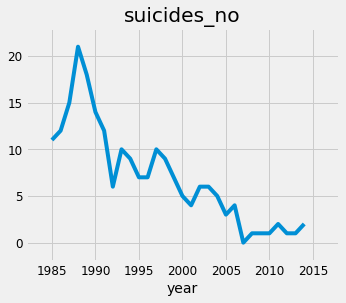

Men range 5-14 year Canada 's suicides_no


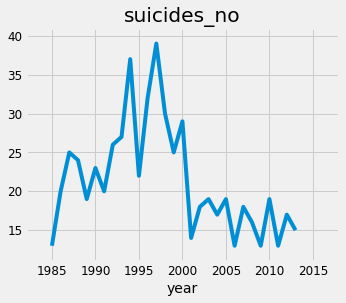

Men range 5-14 year Chile 's suicides_no


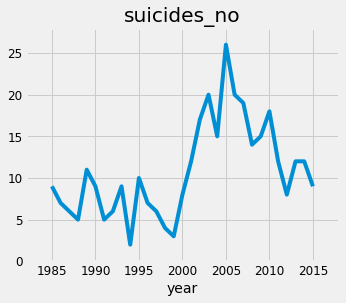

Men range 5-14 year Colombia 's suicides_no


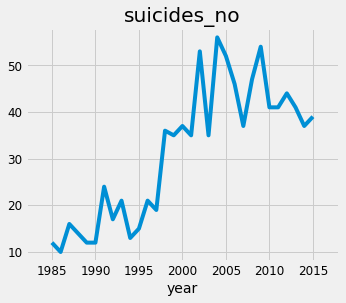

Men range 5-14 year Costa Rica 's suicides_no


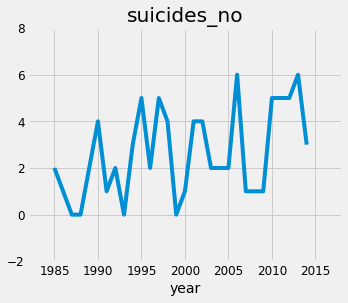

Men range 5-14 year Ecuador 's suicides_no


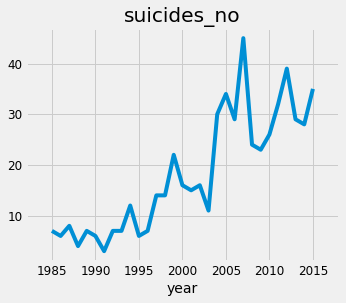

Men range 5-14 year France 's suicides_no


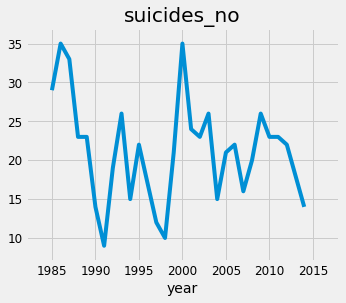

Men range 5-14 year Greece 's suicides_no


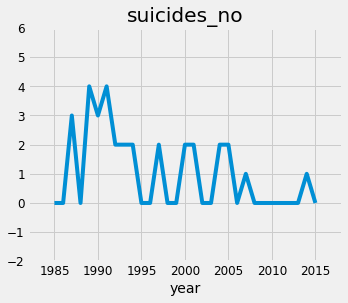

Men range 5-14 year Grenada 's suicides_no


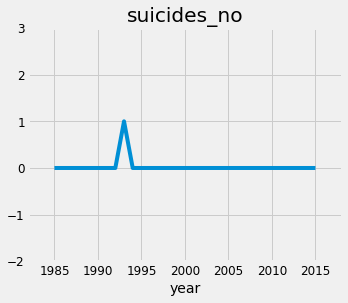

Men range 5-14 year Iceland 's suicides_no


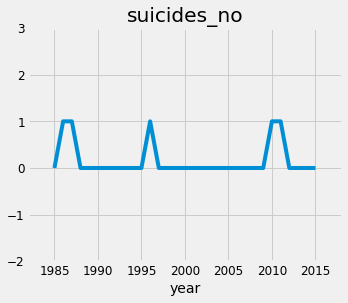

Men range 5-14 year Ireland 's suicides_no


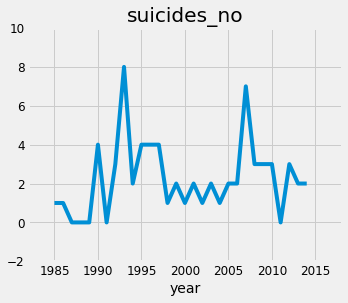

Men range 5-14 year Israel 's suicides_no


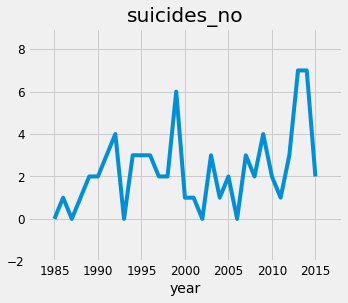

Men range 5-14 year Italy 's suicides_no


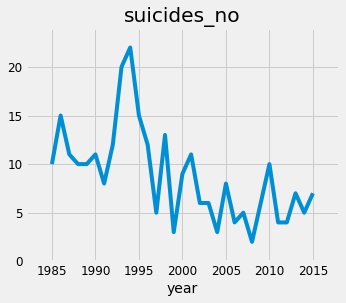

Men range 5-14 year Japan 's suicides_no


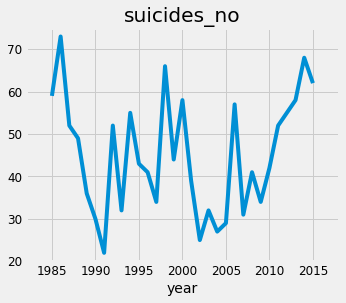

Men range 5-14 year Kuwait 's suicides_no


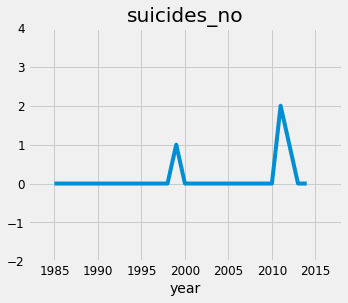

Men range 5-14 year Luxembourg 's suicides_no


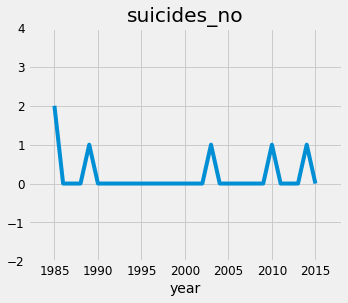

Men range 5-14 year Malta 's suicides_no


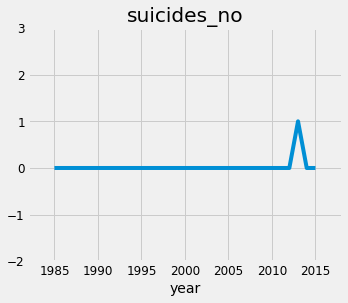

Men range 5-14 year Mauritius 's suicides_no


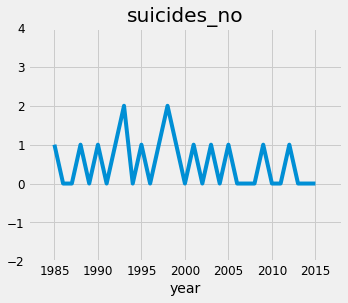

Men range 5-14 year Mexico 's suicides_no


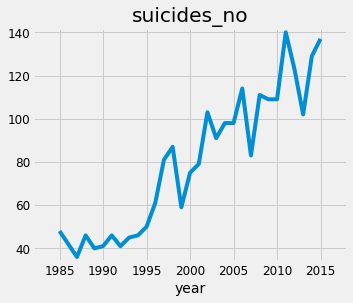

Men range 5-14 year Netherlands 's suicides_no


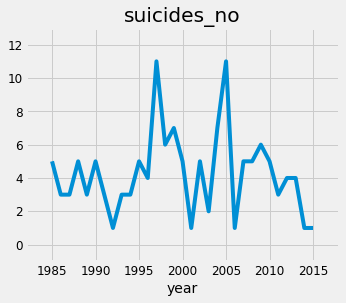

Men range 5-14 year New Zealand 's suicides_no


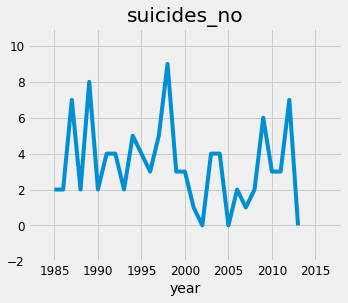

Men range 5-14 year Panama 's suicides_no


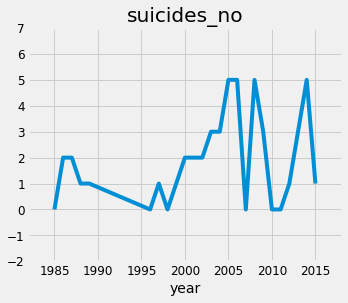

Men range 5-14 year Paraguay 's suicides_no


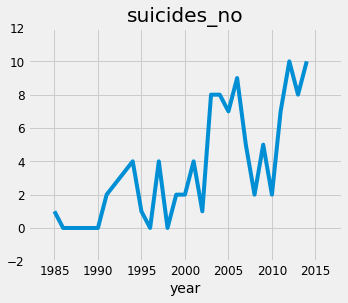

Men range 5-14 year Portugal 's suicides_no


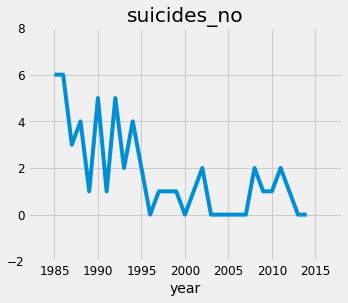

Men range 5-14 year Puerto Rico 's suicides_no


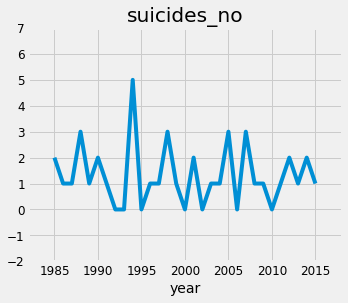

Men range 5-14 year Republic of Korea 's suicides_no


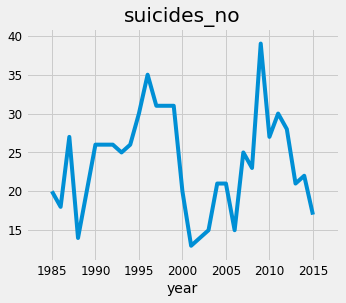

Men range 5-14 year Saint Vincent and Grenadines 's suicides_no


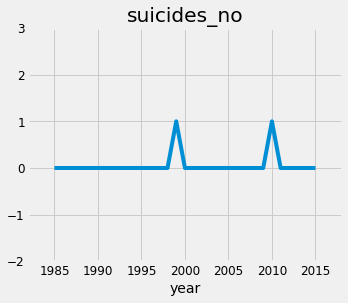

Men range 5-14 year Singapore 's suicides_no


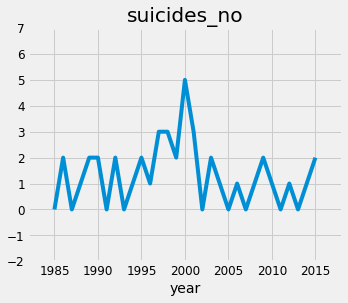

Men range 5-14 year Spain 's suicides_no


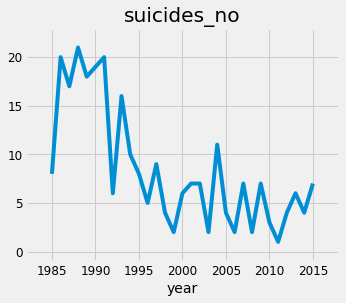

Men range 5-14 year Suriname 's suicides_no


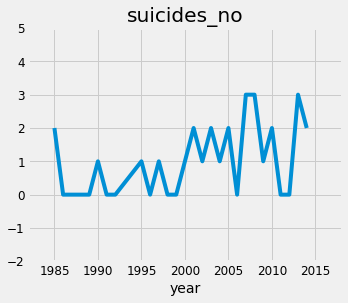

Men range 5-14 year Thailand 's suicides_no


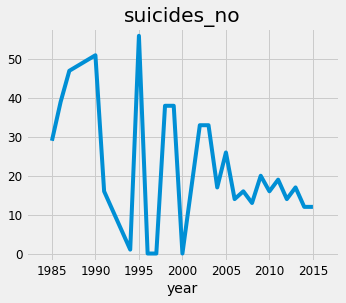

Men range 5-14 year Trinidad and Tobago 's suicides_no


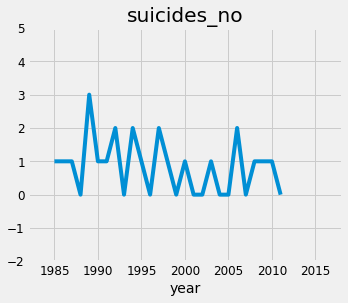

Men range 5-14 year United Kingdom 's suicides_no


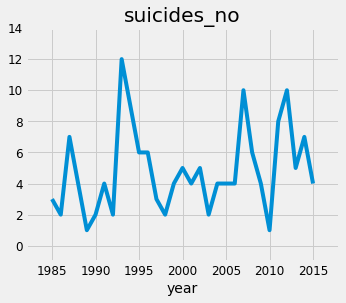

Men range 5-14 year United States 's suicides_no


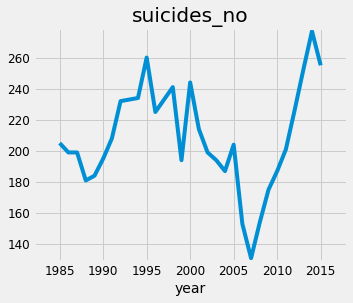

Men range 5-14 year Uruguay 's suicides_no


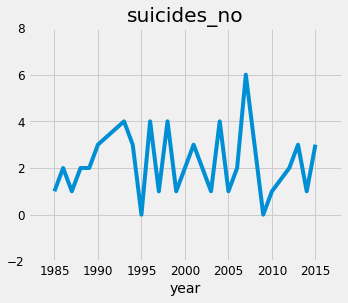

Men range 5-14 year Belize 's suicides_no


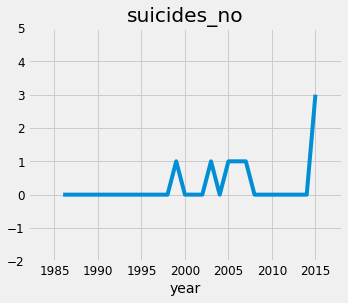

Men range 5-14 year Guatemala 's suicides_no


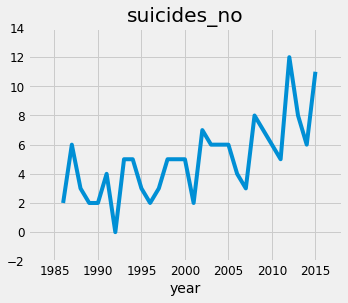

Men range 5-14 year Norway 's suicides_no


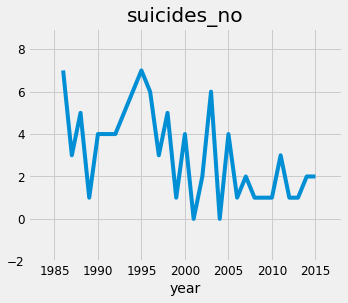

Men range 5-14 year Saint Lucia 's suicides_no


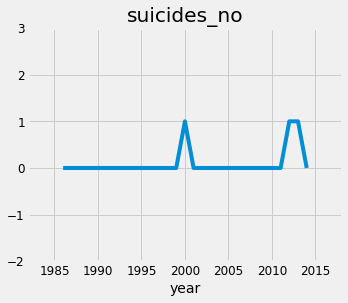

Men range 5-14 year Finland 's suicides_no


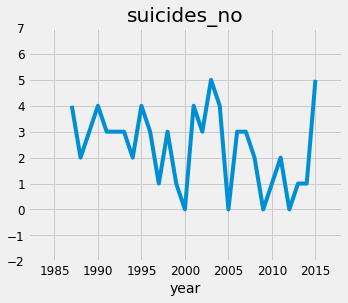

Men range 5-14 year Sweden 's suicides_no


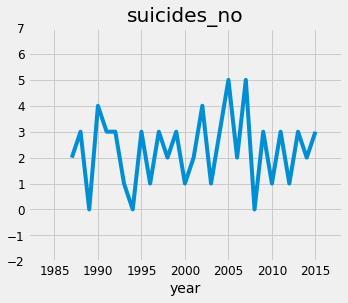

Men range 5-14 year Guyana 's suicides_no


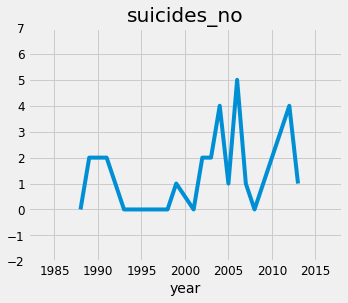

Men range 5-14 year Ukraine 's suicides_no


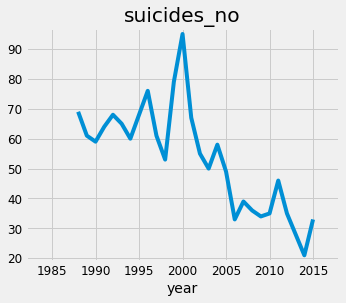

Men range 5-14 year Romania 's suicides_no


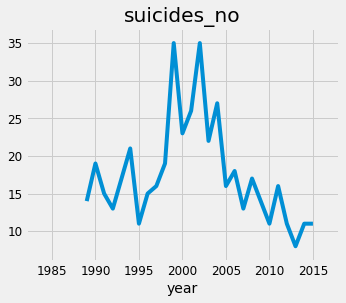

Men range 5-14 year Russian Federation 's suicides_no


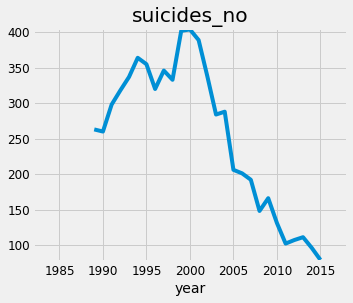

Men range 5-14 year Armenia 's suicides_no


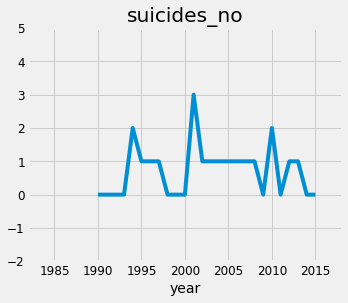

Men range 5-14 year Czech Republic 's suicides_no


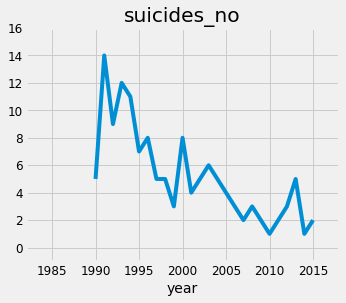

Men range 5-14 year Germany 's suicides_no


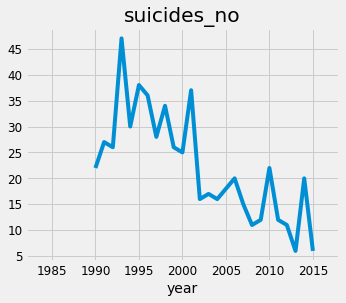

Men range 5-14 year Kazakhstan 's suicides_no


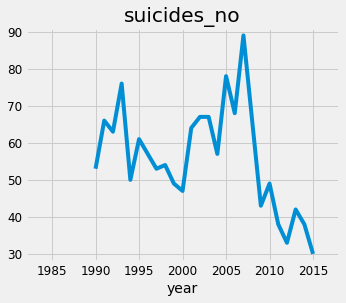

Men range 5-14 year Kyrgyzstan 's suicides_no


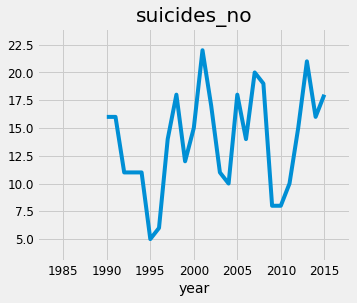

Men range 5-14 year Hungary 's suicides_no


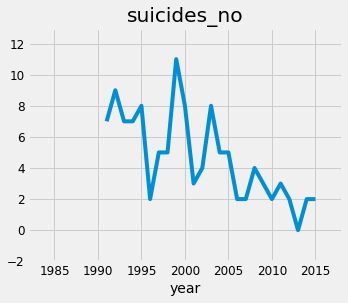

In [ ]:
for s in country:
    for t in targets:
      print("Men range 5-14 year", s,"'s",t)
      plt.figure(figsize = (5,4))
      plt.title(t)

      fig = male_df[male_df["country"] == s][t].plot()
      fig.set_xlim(1982,2018)
      fig.set_ylim(male_df[male_df["country"] == s][t].min()-2,male_df[male_df["country"] == s][t].max()+2)
      plt.show()

WoMen range 5-14 year Argentina 's suicides_no


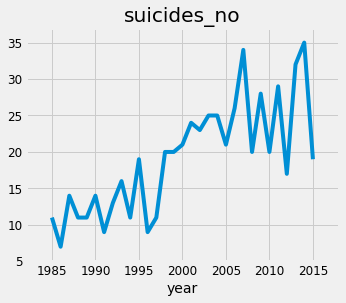

WoMen range 5-14 year Australia 's suicides_no


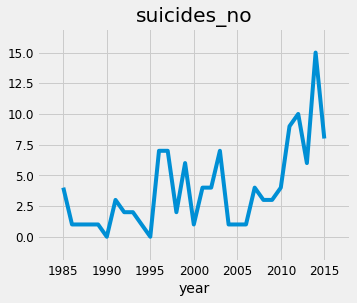

WoMen range 5-14 year Austria 's suicides_no


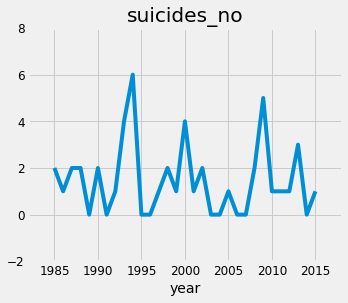

WoMen range 5-14 year Barbados 's suicides_no


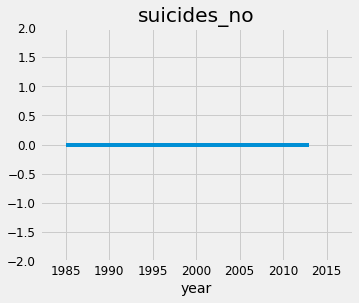

WoMen range 5-14 year Belgium 's suicides_no


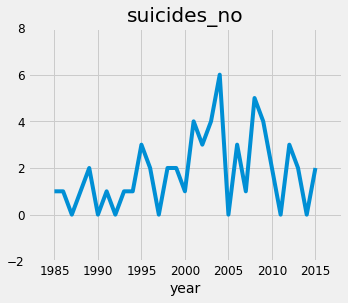

WoMen range 5-14 year Brazil 's suicides_no


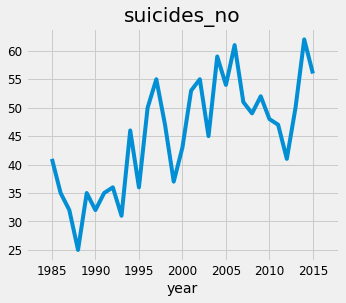

WoMen range 5-14 year Bulgaria 's suicides_no


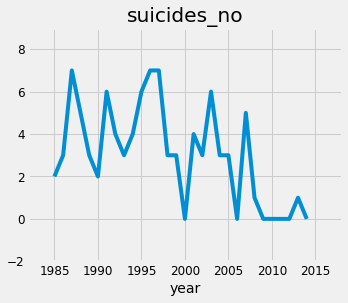

WoMen range 5-14 year Canada 's suicides_no


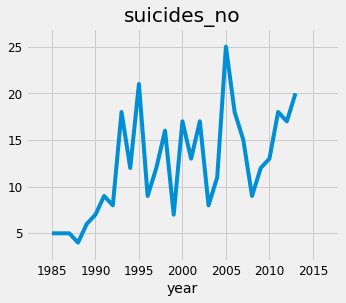

WoMen range 5-14 year Chile 's suicides_no


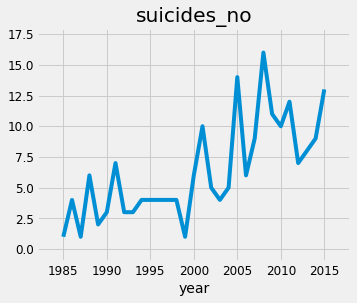

WoMen range 5-14 year Colombia 's suicides_no


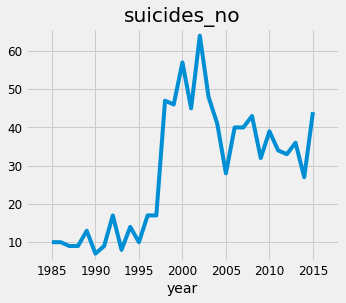

WoMen range 5-14 year Costa Rica 's suicides_no


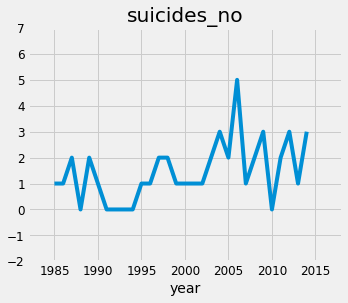

WoMen range 5-14 year Ecuador 's suicides_no


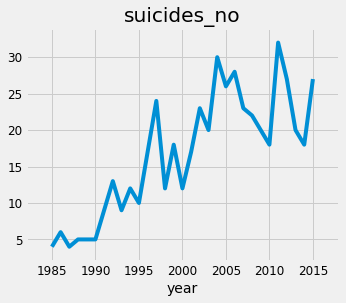

WoMen range 5-14 year France 's suicides_no


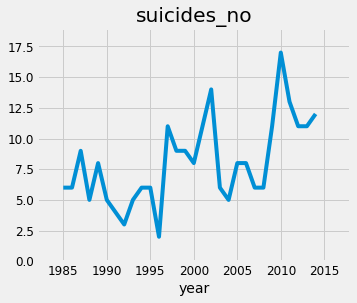

WoMen range 5-14 year Greece 's suicides_no


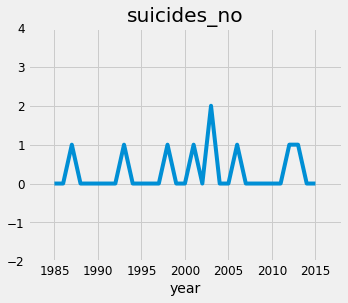

WoMen range 5-14 year Grenada 's suicides_no


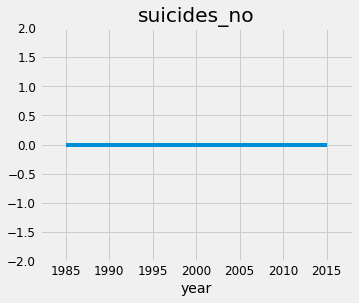

WoMen range 5-14 year Iceland 's suicides_no


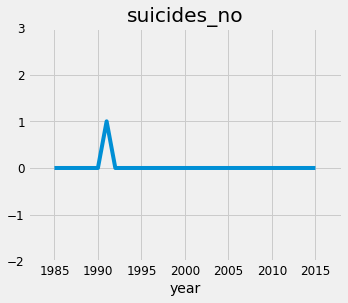

WoMen range 5-14 year Ireland 's suicides_no


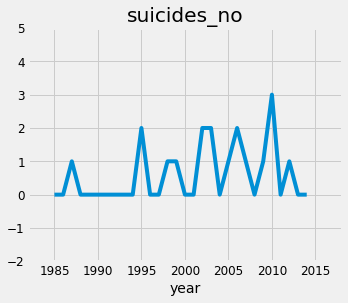

WoMen range 5-14 year Israel 's suicides_no


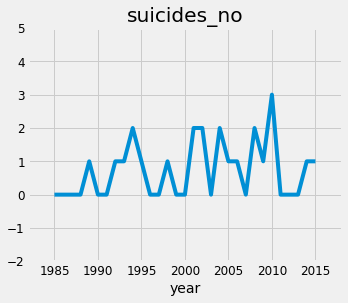

WoMen range 5-14 year Italy 's suicides_no


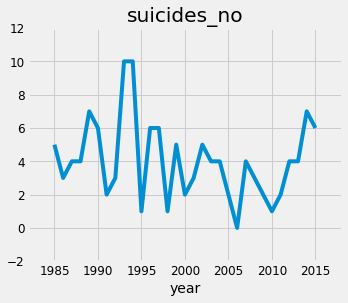

WoMen range 5-14 year Japan 's suicides_no


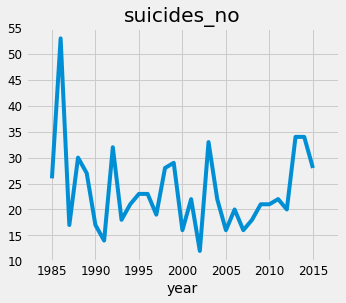

WoMen range 5-14 year Kuwait 's suicides_no


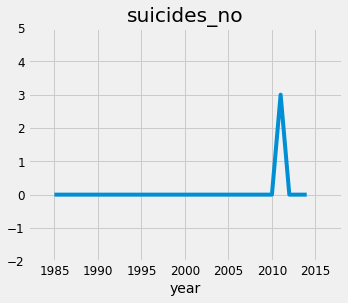

WoMen range 5-14 year Luxembourg 's suicides_no


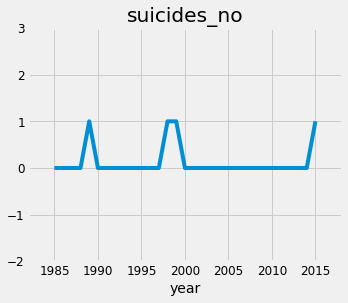

WoMen range 5-14 year Malta 's suicides_no


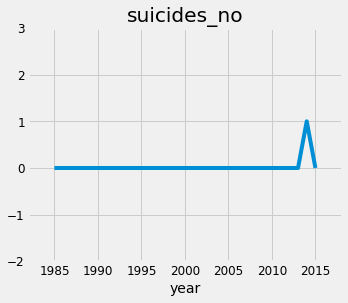

WoMen range 5-14 year Mauritius 's suicides_no


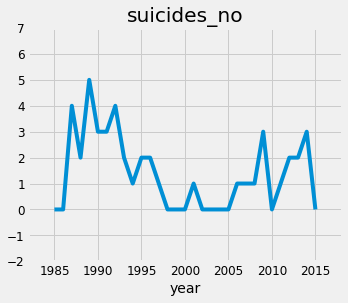

WoMen range 5-14 year Mexico 's suicides_no


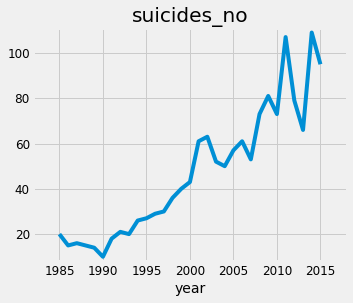

WoMen range 5-14 year Netherlands 's suicides_no


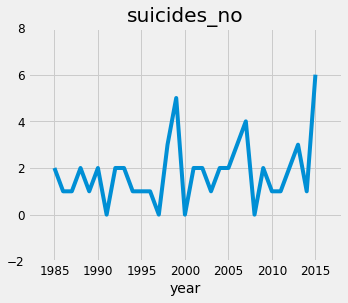

WoMen range 5-14 year New Zealand 's suicides_no


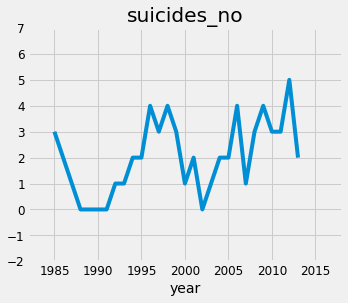

WoMen range 5-14 year Panama 's suicides_no


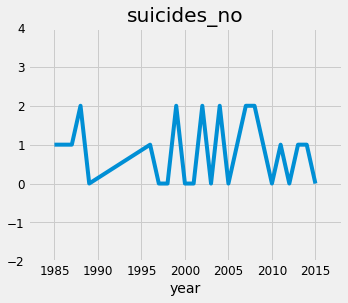

WoMen range 5-14 year Paraguay 's suicides_no


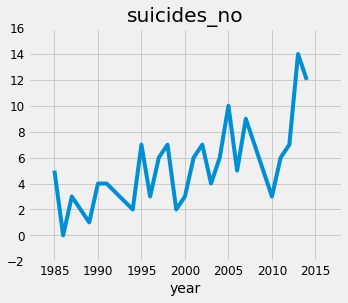

WoMen range 5-14 year Portugal 's suicides_no


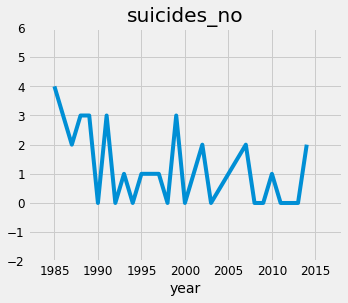

WoMen range 5-14 year Puerto Rico 's suicides_no


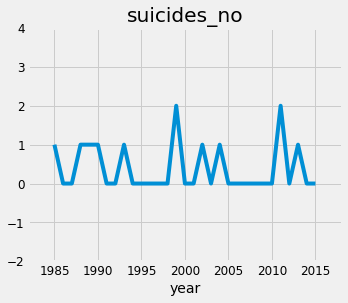

WoMen range 5-14 year Republic of Korea 's suicides_no


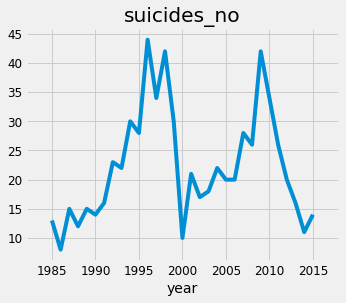

WoMen range 5-14 year Saint Vincent and Grenadines 's suicides_no


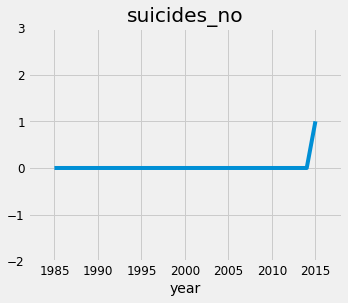

WoMen range 5-14 year Singapore 's suicides_no


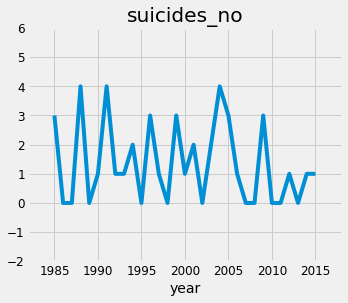

WoMen range 5-14 year Spain 's suicides_no


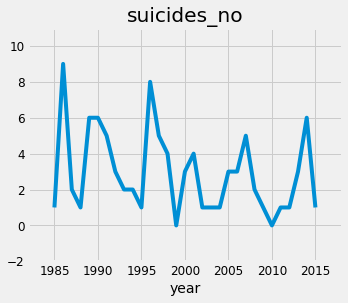

WoMen range 5-14 year Suriname 's suicides_no


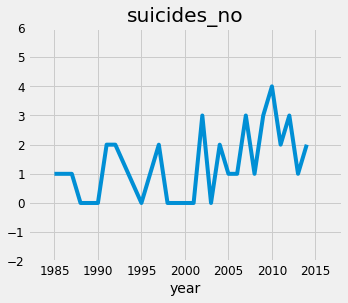

WoMen range 5-14 year Thailand 's suicides_no


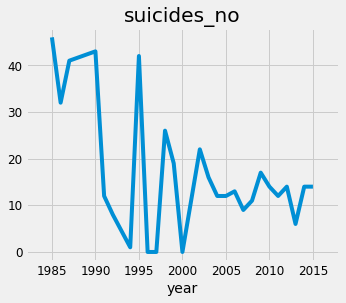

WoMen range 5-14 year Trinidad and Tobago 's suicides_no


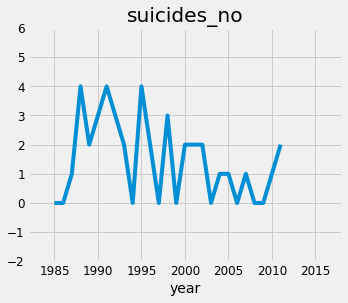

WoMen range 5-14 year United Kingdom 's suicides_no


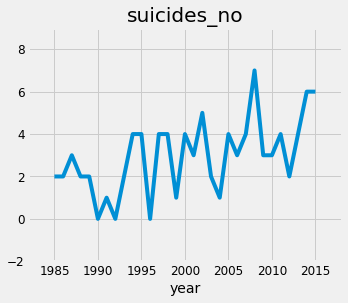

WoMen range 5-14 year United States 's suicides_no


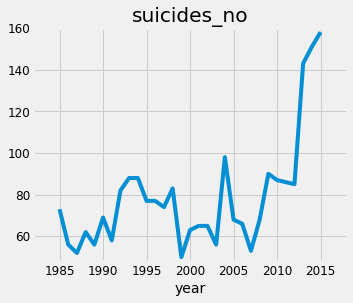

WoMen range 5-14 year Uruguay 's suicides_no


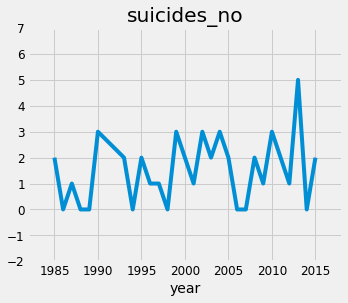

WoMen range 5-14 year Belize 's suicides_no


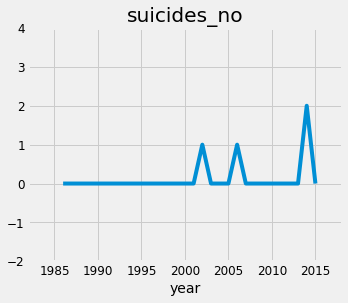

WoMen range 5-14 year Guatemala 's suicides_no


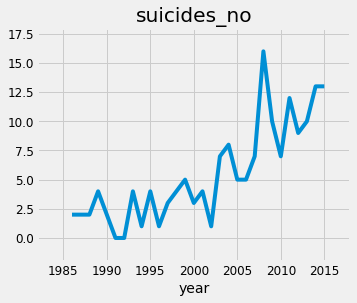

WoMen range 5-14 year Norway 's suicides_no


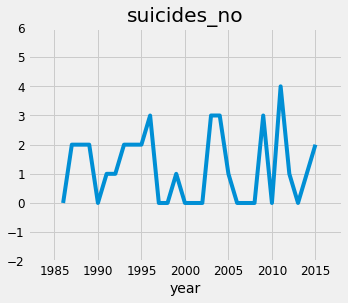

WoMen range 5-14 year Saint Lucia 's suicides_no


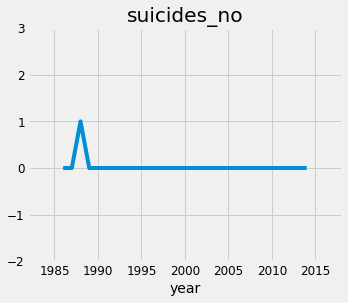

WoMen range 5-14 year Finland 's suicides_no


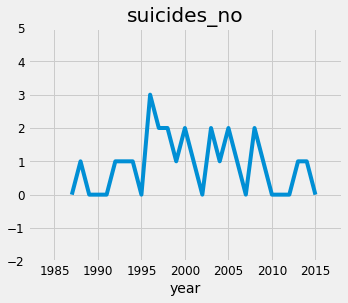

WoMen range 5-14 year Sweden 's suicides_no


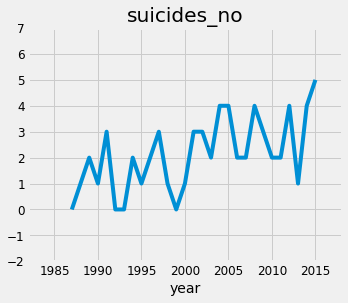

WoMen range 5-14 year Guyana 's suicides_no


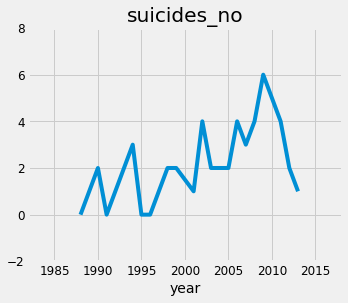

WoMen range 5-14 year Ukraine 's suicides_no


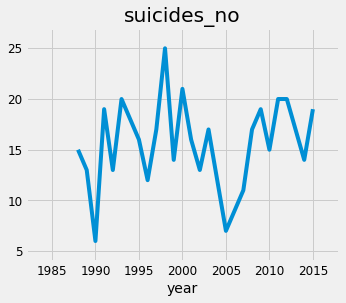

WoMen range 5-14 year Romania 's suicides_no


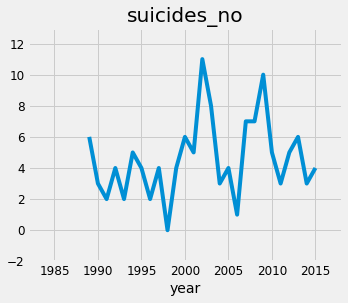

WoMen range 5-14 year Russian Federation 's suicides_no


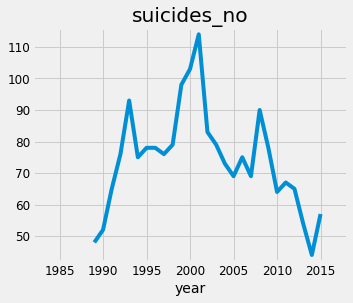

WoMen range 5-14 year Armenia 's suicides_no


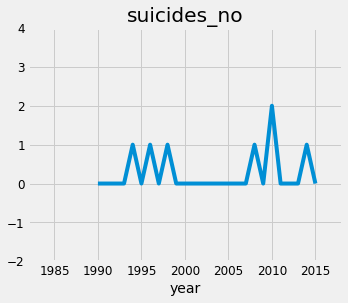

WoMen range 5-14 year Czech Republic 's suicides_no


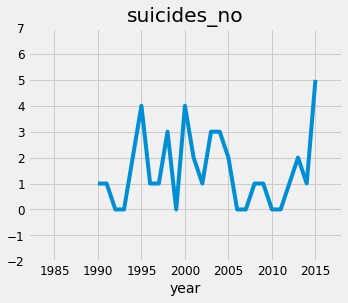

WoMen range 5-14 year Germany 's suicides_no


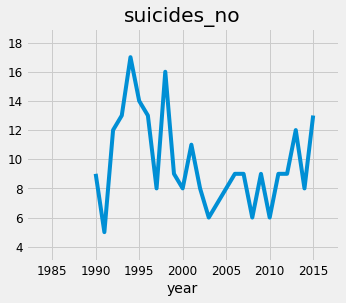

WoMen range 5-14 year Kazakhstan 's suicides_no


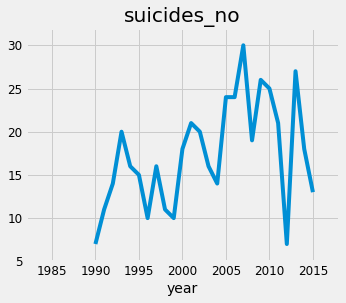

WoMen range 5-14 year Kyrgyzstan 's suicides_no


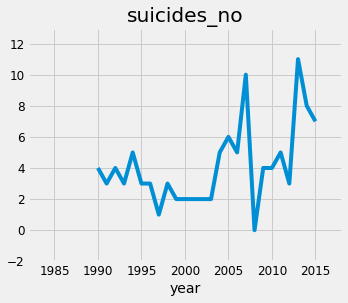

WoMen range 5-14 year Hungary 's suicides_no


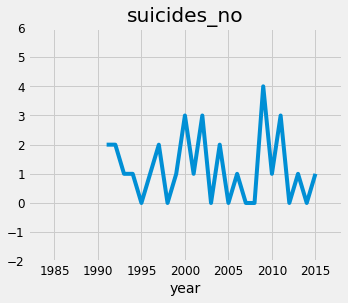

In [ ]:

for s in fecountry:
   
    for t in fetargets:
      print("WoMen range 5-14 year", s,"'s",t)
      plt.figure(figsize = (5,4))
      plt.title(t)

      fig = female_df[female_df["country"] == s][t].plot()
      fig.set_xlim(1982,2018)
      fig.set_ylim(female_df[female_df["country"] == s][t].min()-2,female_df[female_df["country"] == s][t].max()+2)
      plt.show()

The above visualization tells us a lot about our dataset. First, it provides a seasonality trend with small seells at the beginning of the year and an up-trend towards the end. Sometimes this overall visualization does not display some behavior that we want to observe. So the solution is to decompose the signal into three different plots: Trend, Seasonality and Residuals.

In [ ]:
from pylab import rcParams
rcParams['figure.figsize'] = 10, 8
for s in country:
    # j = 0
    for t in targets:
      print("Men range 5-14 year", s,"'s",t)
      decomposition = sm.tsa.seasonal_decompose(male_df[male_df["country"] == s][t], model = 'additive', freq = 3)
      fig = decomposition.plot()
      plt.show()


Output hidden; open in https://colab.research.google.com to view.

In [ ]:
from pylab import rcParams
rcParams['figure.figsize'] = 10, 8
for s in fecountry:

    for t in fetargets:
      print("woMen range 5-14 year", s,"'s",t)
      decomposition = sm.tsa.seasonal_decompose(female_df[female_df["country"] == s][t], model = 'additive', freq = 3)
      fig = decomposition.plot()
      plt.show()


Output hidden; open in https://colab.research.google.com to view.

In [ ]:
male_df

,year,country,suicides_no
0,1985,Argentina,16
1,1985,Australia,4
2,1985,Austria,6
3,1985,Barbados,0
4,1985,Belgium,12
...,...,...,...
1638,2015,Thailand,12
1639,2015,Ukraine,33
1640,2015,United Kingdom,4
1641,2015,United States,255
